<a href="https://colab.research.google.com/github/willaure/House-Sales-in-King-County-USA-/blob/main/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
!pip install -U scikit-learn

In [ ]:
#import piplite
#await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
#from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
#import pandas as pd  # Make sure pandas is imported

# Read the CSV file using pd (pandas module), not df (DataFrame variable)
df = pd.read_csv('kc_house_data.csv')

In [ ]:
#filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#df = pd.read_csv(filepath, header=None)

In [ ]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Print columns to verify what exists
print("Current columns:", df.columns.tolist())

# Only drop columns that exist
cols_to_drop = [col for col in ['id', 'Unnamed: 0'] if col in df.columns]
df.drop(cols_to_drop, axis=1, inplace=True)

# Generate statistical summary
stats_summary = df.describe()
print(stats_summary)

Current columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    wa

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


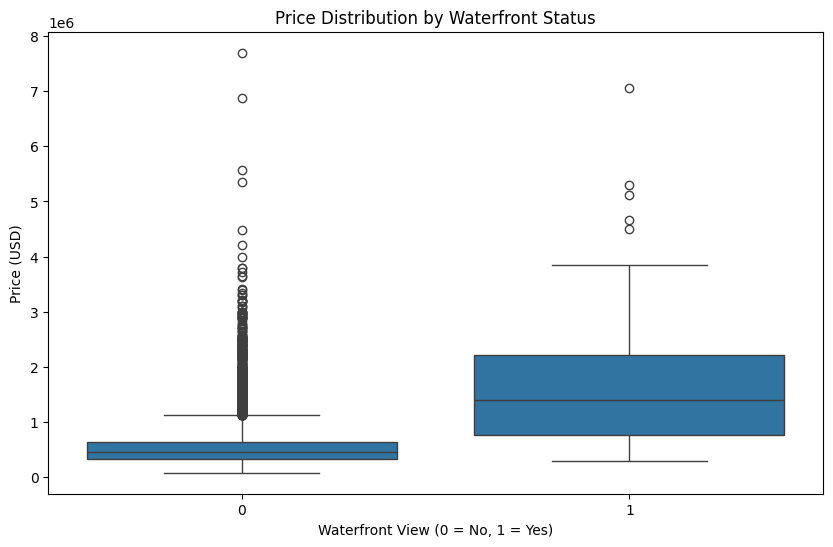

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#import pandas as pd

# Load the dataset
#df = pd.read_csv('kc_house_data.csv')

# Create boxplot comparing prices by waterfront status
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Add titles and labels
plt.title('Price Distribution by Waterfront Status')
plt.xlabel('Waterfront View (0 = No, 1 = Yes)')
plt.ylabel('Price (USD)')

# Display the plot
plt.show()

In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['sqft_living']]  # Feature matrix (must be 2D)
y = df['price']          # Target vector

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)

# Print results
print(f"R-squared value: {r_squared:.4f}")
print(f"Equation: Price = {model.intercept_:.2f} + {model.coef_[0]:.2f}*sqft_living")

# Fixed: Convert predictions to Series before using .head()
predictions = pd.Series(model.predict(X), name='Predicted')
results = pd.DataFrame({'Actual': y.head(), 'Predicted': predictions.head()})

print("\nFirst 5 predictions:")
print(results)

R-squared value: 0.4929
Equation: Price = -43580.74 + 280.62*sqft_living

First 5 predictions:
     Actual      Predicted
0  221900.0  287555.067025
1  538000.0  677621.826402
2  180000.0  172499.404187
3  604000.0  506441.449985
4  510000.0  427866.850973


In [ ]:
#Enter Your Code, Execute and take the Screenshot
# Import required libraries
# Define the features to use
features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Prepare the data
X = df[features]  # Feature matrix (multiple features)
y = df['price']   # Target variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r_squared = model.score(X, y)

# Display results
print("Multiple Linear Regression Results")
print("=================================")
print(f"Independent Variables: {features}")
print(f"Dependent Variable: 'price'")
print(f"\nR-squared (R²) value: {r_squared:.4f}")

# Print coefficients for each feature
print("\nRegression Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"\nIntercept: {model.intercept_:.2f}")

Multiple Linear Regression Results
Independent Variables: ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
Dependent Variable: 'price'

R-squared (R²) value: 0.6577

Regression Coefficients:
floors: -29350.68
waterfront: 602163.81
lat: 673032.30
bedrooms: -25857.62
sqft_basement: 64.46
view: 67052.49
bathrooms: -3472.50
sqft_living15: 4.32
sqft_above: 64.94
grade: 82166.71
sqft_living: 129.40

Intercept: -32393034.00


In [ ]:
#Enter Your Code, Execute and take the Screenshot
# Define features
features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Prepare data
X = df[features]
y = df['price']

# Create pipeline
input_steps = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

pipeline = Pipeline(input_steps)

# Fit the pipeline
pipeline.fit(X, y)

# Calculate R-squared
r_squared = pipeline.score(X, y)

# Display results
print("Pipeline Regression Results")
print("==========================")
print("Pipeline Steps:")
for step in input_steps:
    print(f"- {step[0]}: {step[1].__class__.__name__}")
print(f"\nR-squared (R²) value: {r_squared:.4f}")

# Optional: Show feature coefficients
if hasattr(pipeline.named_steps['model'], 'coef_'):
    print("\nNumber of coefficients:", len(pipeline.named_steps['model'].coef_))

Pipeline Regression Results
Pipeline Steps:
- scale: StandardScaler
- polynomial: PolynomialFeatures
- model: LinearRegression

R-squared (R²) value: 0.7513

Number of coefficients: 77


In [ ]:
#Enter Your Code, Execute and take the Screenshot
# Import required libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
#df = pd.read_csv('kc_house_data.csv')

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit Ridge regression with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_scaled, y_train)

# Calculate R-squared on test data
test_r_squared = ridge_model.score(X_test_scaled, y_test)

# Display results
print("Ridge Regression Results")
print("========================")
print(f"Regularization parameter (alpha): 0.1")
print(f"Test R-squared (R²) value: {test_r_squared:.4f}")

# Optional: Compare with training score
train_r_squared = ridge_model.score(X_train_scaled, y_train)
print(f"Training R-squared (R²) value: {train_r_squared:.4f}")

Ridge Regression Results
Regularization parameter (alpha): 0.1
Test R-squared (R²) value: 0.6615
Training R-squared (R²) value: 0.6565


In [ ]:
# Import required libraries
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import pandas as pd

# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms",
            "sqft_basement", "view", "bathrooms",
            "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing and modeling pipeline
model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=0.1)
)

# Fit the model
model.fit(X_train, y_train)

# Calculate R-squared on test data
test_r_squared = model.score(X_test, y_test)

# Display results
print("Polynomial Ridge Regression Results (2nd degree)")
print("==============================================")
print(f"Regularization parameter (alpha): 0.1")
print(f"Number of features: {model.named_steps['polynomialfeatures'].n_output_features_}")
print(f"Test R-squared (R²) value: {test_r_squared:.4f}")

# Optional: Show first 5 predictions vs actual
predictions = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test.head(), 'Predicted': predictions[:5]})
print("\nFirst 5 predictions vs actual:")
print(results)

Polynomial Ridge Regression Results (2nd degree)
Regularization parameter (alpha): 0.1
Number of features: 77
Test R-squared (R²) value: 0.7027

First 5 predictions vs actual:
          Actual     Predicted
735     365000.0  4.350568e+05
2830    865000.0  7.296839e+05
4106   1038000.0  1.240099e+06
16218  1490000.0  1.764077e+06
19964   711000.0  7.058575e+05


# Nouvelle section